In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from skimage.feature import hog
from sklearn.linear_model import Ridge
import matplotlib.colors as mcolors
colours = list(reversed(mcolors.TABLEAU_COLORS.keys()))


# Pressures

In [2]:
data=np.load("pressures.npy")
print(data.shape)
col1=data[:,0][0]
col1_x=data[:,1][0]
col2=data[:,0][1]
col2_x=data[:,1][1]
col3=data[:,0][2]
col3_x=data[:,1][2]
col4=data[:,0][3]
col4_x=data[:,1][3]
col5=data[:,0][4]
col5_x=data[:,1][4]

def range_(col):
    return np.round(np.max(col)-np.min(col),2)

print("average",np.round(np.average(col1),2),"&",np.round(np.average(col2),2),"&",np.round(np.average(col3),2),"&",np.round(np.average(col4),2),"&",np.round(np.average(col5),2))
print("median",np.round(np.median(col1),2),"&",np.round(np.median(col2),2),"&",np.round(np.median(col3),2),"&",np.round(np.median(col4),2),"&",np.round(np.median(col5),2))
print("range",np.round(range_(col1),2),"&",np.round(range_(col2),2),"&",np.round(range_(col3),2),"&",np.round(range_(col4),2),"&",np.round(range_(col5),2))
print("std",np.round(np.std(col1),2),"&",np.round(np.std(col2),2),"&",np.round(np.std(col3),2),"&",np.round(np.std(col4),2),"&",np.round(np.std(col5),2))

(100, 2, 5)
average 47.86 & 37.05 & 61.6 & 63.2 & 62.87
median 61.33 & 59.37 & 61.9 & 57.85 & 64.53
range 65.85 & 63.02 & 7.91 & 28.17 & 6.98
std 24.85 & 30.28 & 2.71 & 10.76 & 3.0


In [3]:
log=np.load("errorlog.npy")
x=log[:,0]
print(100 - sum(log[:,1])/len(x[x!=0])*100,"% always increasing")


20.0 % always increasing


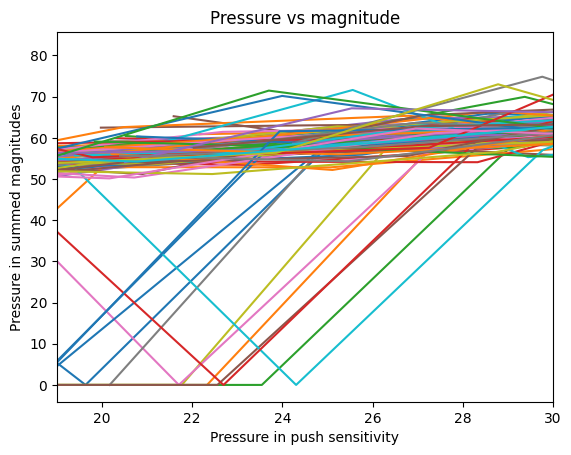

In [4]:
data=np.load("pressures.npy")
CM=1
ST=0.2
for i in range(len(data)):
    plt.plot(data[:,1][i]/200,data[:,0][i])

plt.xlim([19,30])
plt.xlabel("Pressure in push sensitivity")
plt.ylabel("Pressure in summed magnitudes")
plt.title("Pressure vs magnitude")
plt.show()


## Modelling data 

In [5]:
vecs=np.load("vectors.npy")

classes=data[:,1][0]/200
def find_nearest(array, value): #return class
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

SIZE=75
X_data=vecs[0:SIZE].reshape((len(vecs[0:SIZE])*vecs.shape[1],vecs.shape[2]*2))
y_data=data[:,1][0:SIZE].flatten()/200
y=[]
for i in range(len(X_data)):
    ax=np.zeros((5,))
    ax[i%5]=1
    y.append(ax)
y=np.array(y)
print(X_data.shape)
print(y_data.shape)

(375, 266)
(375,)


In [11]:
#reg = LinearRegression(positive=True).fit(X_data, y_data)
reg = Ridge().fit(X_data, y_data)
print("Score on training",reg.score(X_data, y_data))
dist=0
for i in range(99):
    num=random.randint(0,4)
    n=random.randint(75,99)
    dat=vecs[n][num].reshape(1,vecs.shape[2]*2)
    #print("Predicted",reg.predict(np.array(dat)),"Actual:",data[:,1][n][num]/200)
    dist+=abs(data[:,1][n][num]/200-reg.predict(np.array(dat)))
print("Average dist on unseen data:",dist/99)
#np.argmax(reg.predict(X_data),axis=1)
print(dat.shape,vecs.shape)

Score on training 0.958537253645075
Average dist on unseen data: [1.41111383]
(1, 266) (100, 5, 133, 2)


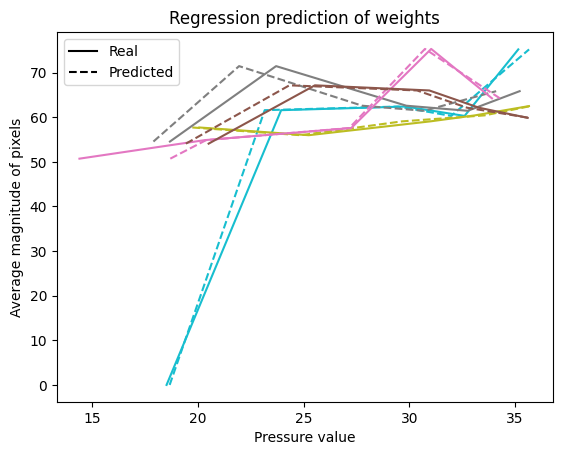

In [14]:
colours=["b","r","y","g","o"]
import matplotlib.colors as mcolors
colours = list(reversed(mcolors.TABLEAU_COLORS.keys()))
for i in range(5):
    n=90+i
    dat=vecs[n].reshape(5,vecs.shape[2]*2)
    x=data[:,0][n]
    p=reg.predict(np.array(dat))
    r=data[:,1][n]/200
    plt.plot(p,x,'--',c=colours[i])
    plt.plot(r,x,c=colours[i])


a = Line2D([0], [0], label='Real', color='black')
b = Line2D([0], [0], linestyle='--', label='Predicted', color='black')
plt.legend(handles=[a,b])
plt.title("Regression prediction of weights")
plt.ylabel("Average magnitude of pixels")
plt.xlabel("Pressure value")
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf

# Generate some random training data
input_dim = 5

# Generate random input vectors
input_data = X_data.copy()

# Generate corresponding pressure values
pressure_values = y_data.copy()

# Split the data into training and testing sets
train_ratio = 0.8
train_samples = 75

train_input = input_data[:train_samples]
train_output = pressure_values[:train_samples]

test_input = input_data[train_samples:]
test_output = pressure_values[train_samples:]

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(292,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
epochs = 100
batch_size = 32

model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

# Evaluate the model
loss = model.evaluate(test_input, test_output)
print('Test loss:', loss)


In [ ]:
# Use the model to make predictions
prediction_input = input_data[75:-1]
predictions = model.predict(prediction_input)

print('Predictions:')
dist=0
for i in range(len(prediction_input)):
    """print('Input:', prediction_input[i])
    print('Predicted Pressure:', predictions[i][0])
    print('Actual Pressure:', pressure_values[i])
    print('-------------------')"""
    dist+=abs(predictions[i][0]-pressure_values[i])
print("average",dist/len(prediction_input))

# Speeds

(15, 4)


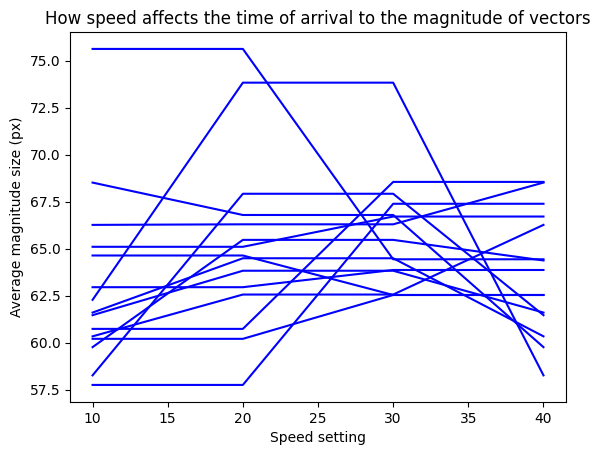

In [3]:
data=np.load("speeds2.npy")
speeds=[10,20,30,40] #speeds=[10,15,20,25,30]
for trial in range(data.shape[0]):
     plt.plot(speeds,data[trial],label="Exp"+str(trial),c="b")
print(data.shape)
plt.xlabel("Speed setting")
plt.ylabel("Average magnitude size (px)")
plt.title("How speed affects the time of arrival to the magnitude of vectors")
#plt.legend(loc="lower left")
plt.show()

### Attempts to do it as nn

## Regression model

In [4]:
vecs=np.load("speed_vectors2.npy")

SIZE=10
X_data=vecs[0:SIZE].reshape((len(vecs[0:SIZE])*vecs.shape[1],vecs.shape[2]*2))
y=np.zeros((len(vecs[0:SIZE])*vecs.shape[1]))
for i in range(len(y)):
    y[i]=speeds[i%len(speeds)]
print(X_data.shape)
print(y.shape)

(40, 266)
(40,)


In [31]:
speeds_reg = Ridge().fit(X_data, y)
print("Score on training",speeds_reg.score(X_data, y))
dist=0
for i in range(10,len(vecs)):
    n=random.randint(0,len(speeds)-1)
    vectors=vecs[i][n].reshape(1,vecs[i][n].shape[0]*2)
    speed=speeds[n]
    print("Predicted",speeds_reg.predict(vectors),"Actual:",speed)
    dist+=abs(speed-speeds_reg.predict(vectors))
print("Average dist on unseen data:",dist/len(vecs))

Score on training 0.8277987923968985
Predicted [32.5311079] Actual: 40
Predicted [34.13357954] Actual: 30
Predicted [34.29215978] Actual: 30
Predicted [28.37531324] Actual: 40
Predicted [21.57946964] Actual: 20
Average dist on unseen data: [1.93991919]


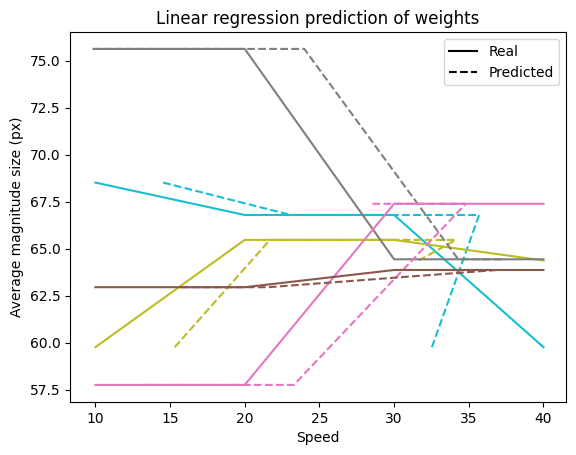

In [29]:
for i in range(5):
    n=10+i
    vectors=vecs[n].reshape(vecs[n].shape[0],vecs[n].shape[1]*2)
    x=data[n]
    p=speeds_reg.predict(vectors)
    plt.plot(p,x,'--',c=colours[i])
    plt.plot(speeds,x,c=colours[i])


a = Line2D([0], [0], label='Real', color='black')
b = Line2D([0], [0], linestyle='--', label='Predicted', color='black')
plt.legend(handles=[a,b])
plt.title("Linear regression prediction of weights")
plt.ylabel("Average magnitude size (px)")
plt.xlabel("Speed")
plt.show()

In [38]:

# Generate random input vectors
input_data = X_data.copy()

# Generate corresponding pressure values
pressure_values = y.copy()

# Split the data into training and testing sets
train_ratio = 0.8
train_samples = 25

train_input = input_data[:train_samples]
train_output = pressure_values[:train_samples]

test_input = input_data[train_samples:]
test_output = pressure_values[train_samples:]

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(152,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
epochs = 100
batch_size = 32

model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

# Evaluate the model
loss = model.evaluate(test_input, test_output)
print('Test loss:', loss)


Epoch 1/100
1/1 [==============================] - 0s 358ms/step - loss: 664.0585
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 568.3801
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 485.9484
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 414.8843
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 353.5689
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 299.6684
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 252.8129
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 212.1811
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 178.6870
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 152.5692
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 135.2339
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 125.7423
Epoch 13/100
1/1 [=================

In [41]:
# Use the model to make predictions
prediction_input = input_data[25:-1]
predictions = model.predict(prediction_input)

print('Predictions:')
dist=0
for i in range(len(prediction_input)):
    dist+=abs(predictions[i][0]-pressure_values[i])
print("average",dist/len(prediction_input))

1/1 [==============================] - 0s 64ms/step
Predictions:
average 12.716805458068848


## Weight


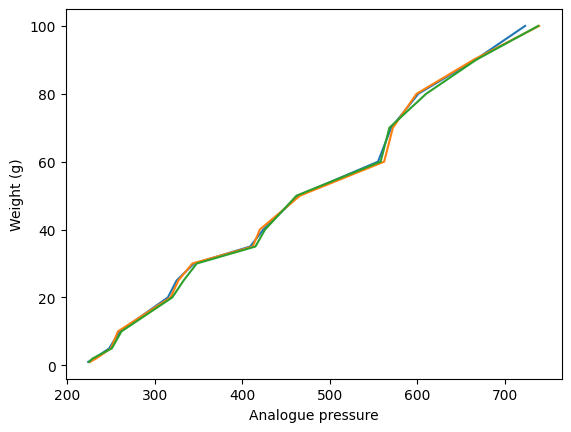

In [9]:
table=[1,2,5,10,20,25,30,35,40,50,60,70,80,90,100
]

data=[
    [224,231,248,260,315,325,345,409,424,464,555,570,601,666,723],
[226,233,250,258,318,327,343,412,420,466,562,572,599,664,739],
[225,229,251,262,320,333,348,415,426,462,558,568,610,667,738]
]
all=np.zeros((len(data[0]),))
for i in range(len(data)):
    plt.plot(data[i],table)
    all+=np.array(data[i])
all=all/3
plt.ylabel("Weight (g)")
plt.xlabel("Analogue pressure")
plt.show()

In [13]:
#modelling 
X=all.reshape((all.shape[0],1))/100
y=np.array(table).astype(float)
print(X.shape,y.shape)
weight_model = LinearRegression(positive=True).fit(X, y)
print("Score on training",weight_model.score(X,y))

(15, 1) (15,)
Score on training 0.9917551331474158


In [14]:
value=600
print("Predict weight:",round(weight_model.predict(np.array([[value/100]]))[0],2),"g")

Predict weight: 75.21 g


In [15]:
import pickle
name="pickle_weight_model.pkl"
with open(name,'wb') as file:
    pickle.dump(weight_model,file)


## Edges

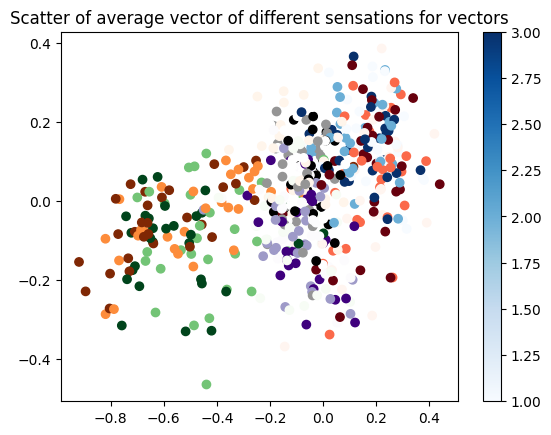

In [38]:
soft=np.load("dirs3_soft.npy")
hard=np.load("dirs2.npy")
samples_2=3
SAMP=5  
for i in range(len(soft)):
    f=soft[i][0][0:SAMP]
    l=soft[i][1][0:SAMP]
    r=soft[i][2][0:SAMP]
    f1=hard[i][0][0:SAMP]
    l1=hard[i][1][0:SAMP]
    r1=hard[i][2][0:SAMP]
    weights = np.arange(1, samples_2+1)
    #show soft
    plt.scatter(f[:,0],f[:,1],c=weights, cmap='Purples')
    plt.scatter(l[:,0],l[:,1],c=weights, cmap='Greens')
    plt.scatter(r[:,0],r[:,1],c=weights, cmap='Reds')
    #show hard
    plt.scatter(f1[:,0],f1[:,1],c=weights, cmap='Greys')
    plt.scatter(l1[:,0],l1[:,1],c=weights, cmap='Oranges')
    plt.scatter(r1[:,0],r1[:,1],c=weights, cmap='Blues')

plt.colorbar()
plt.title("Scatter of average vector of different sensations on soft and hard surfaces")
plt.show()